Creating FSM
Import packages needed to create model

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_style('darkgrid')
%matplotlib inline

Import functions to check model assumptions 

In [2]:
def check_for_assumptions(modelname):
    rsquared = modelname.rsquared
    params = modelname.params
    print(f'Rsquared of Model: {rsquared}')
    print('----------')
    print('Beta values of Model:')
    print(params)
    rainbow_statistic, rainbow_p_value = linear_rainbow(modelname)
    print("Rainbow statistic:", rainbow_statistic)
    print("Rainbow p-value:", rainbow_p_value)
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    residuals = modelname.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax[0])
    ax[0].set_title('QQ-Plot of Residuals')
    ax[1].scatter(modelname.predict(), modelname.resid)
    sns.set(font_scale = 1)
    ax[1].set_title('Homoscadasicity Assumption')
    plt.xlabel('Model Predictions')
    plt.ylabel('Model Residuals')
    ax[1].plot(modelname.predict(), [0 for i in range(len(df))], color = 'red')
    fig.tight_layout()
    return plt.show()
def check_for_assumptions_with_kde(modelname):
    rsquared = modelname.rsquared
    params = modelname.params
    print(f'Rsquared of Model: {rsquared}')
    print('----------')
    print('Beta values of Model:')
    print(params)
    rainbow_statistic, rainbow_p_value = linear_rainbow(modelname)
    print("Rainbow statistic:", rainbow_statistic)
    print("Rainbow p-value:", rainbow_p_value)
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    residuals = modelname.resid
    sns.kdeplot(residuals, shade=True, ax=ax[0])
    ax[0].set_title('Normality Assumption of Residuals')
    ax[1].scatter(modelname.predict(), modelname.resid)
    sns.set(font_scale = 1)
    ax[1].set_title('Homoscadasicity Assumption')
    plt.xlabel('Model Predictions')
    plt.ylabel('Model Residuals')
    ax[1].plot(modelname.predict(), [0 for i in range(len(df))], color = 'red')
    fig.tight_layout()
    return plt.show()

import our data

In [3]:
df = pd.read_csv('../asp_original', index_col = 0)
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0,0,0,N,N,0.0,0,0,0,N
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,0,0,0,N,N,0.0,0,1,0,N
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,0,0,0,N,N,0.0,0,1,0,N
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,0,0,0,N,N,0.0,0,1,0,N
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0,0,0,N,N,0.0,0,0,0,N


In [4]:
fsm_df = df[['squarefeettotalliving','saleprice','buildinggrade','township']]

formula = 'saleprice~squarefeettotalliving'
fsm = ols(formula=formula, data=fsm_df).fit()
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:25:48   Log-Likelihood:            -2.5485e+05
No. Observations:               18182   AIC:                         5.097e+05
Df Residuals:                   18180   BIC:                         5.097e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.743e+05   5990.934     29.100      0.000    1.63e+05    1.86e+05
squarefeettotalliving   272.4830      2.717    100.297      0.000     267.158     277.808
==============================================================================
Omnibus:                     3786.589   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9616.674
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       5.736   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rsquared of Model: 0.356219569182047
----------
Beta values of Model:
Intercept                174335.332720
squarefeettotalliving       272.482958
dtype: float64
Rainbow statistic: 1.096340108280354
Rainbow p-value: 5.833140453065492e-06


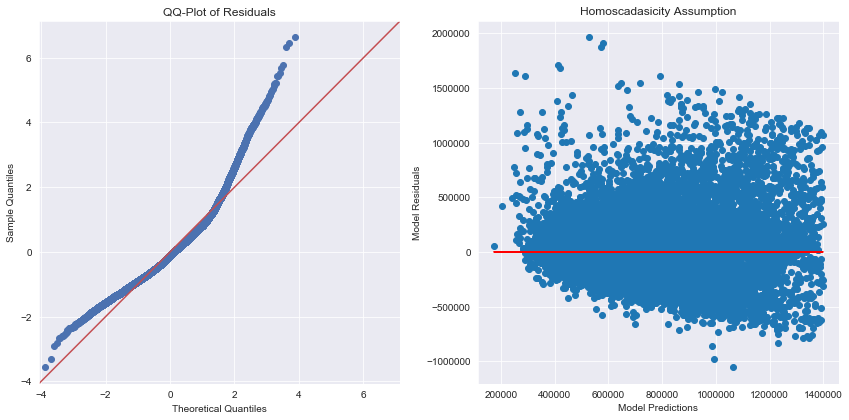

In [5]:
check_for_assumptions(fsm)

Rsquared of Model: 0.356219569182047
----------
Beta values of Model:
Intercept                174335.332720
squarefeettotalliving       272.482958
dtype: float64
Rainbow statistic: 1.096340108280354
Rainbow p-value: 5.833140453065492e-06


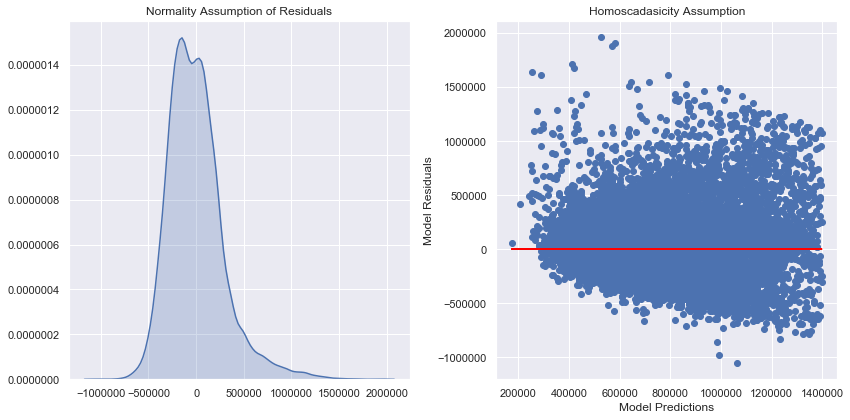

In [6]:
check_for_assumptions_with_kde(fsm)

r^2 of 0.356, not great, but not terrible.  Assumptions look pretty good.  Let's see if we can improve this with additional features

In [7]:
mod1_df = fsm_df
formula = 'saleprice ~ squarefeettotalliving + buildinggrade'
mod1 = ols(formula=formula, data = mod1_df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     6891.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:30:04   Log-Likelihood:            -2.5372e+05
No. Observations:               18182   AIC:                         5.074e+05
Df Residuals:                   18179   BIC:                         5.075e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -5.836e+05   1.65e+04    -35.427      0.000   -6.16e+05   -5.51e+05
squarefeettotalliving   146.6880      3.623     40.492      0.000     139.587     153.789
buildinggrade          1.335e+05   2726.919     48.958      0.000    1.28e+05    1.39e+05
==============================================================================
Omnibus:                     4239.826   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12495.814
Skew:                           1.214   Prob(JB):                         0.00
Kurtosis:                       6.256   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

r^2 improved, up to .431, jwhat do the assumptions look like?

Rsquared of Model: 0.4312145763711821
----------
Beta values of Model:
Intercept               -583622.978752
squarefeettotalliving       146.688038
buildinggrade            133505.522923
dtype: float64
Rainbow statistic: 1.0914125397473837
Rainbow p-value: 1.529782299407375e-05


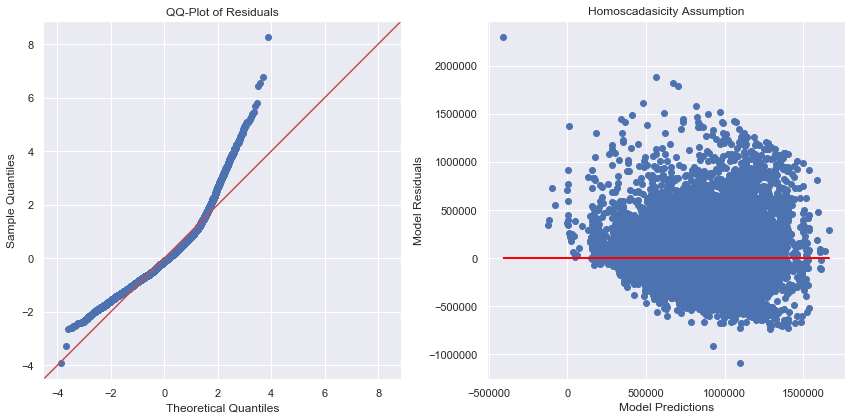

In [8]:
check_for_assumptions(mod1)

Rsquared of Model: 0.4312145763711821
----------
Beta values of Model:
Intercept               -583622.978752
squarefeettotalliving       146.688038
buildinggrade            133505.522923
dtype: float64
Rainbow statistic: 1.0914125397473837
Rainbow p-value: 1.529782299407375e-05


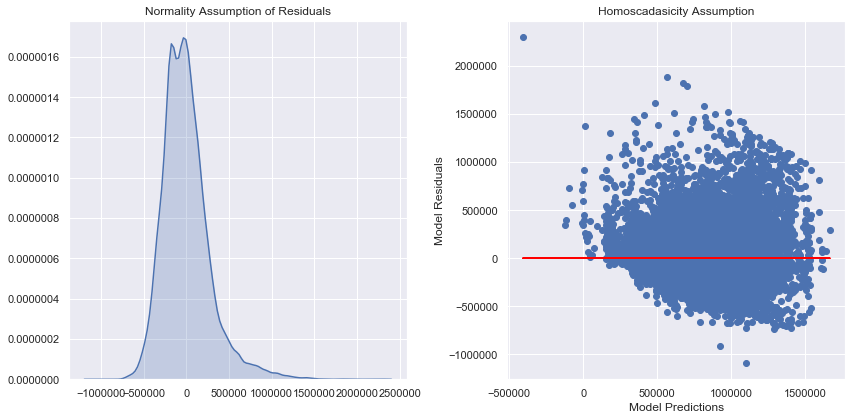

In [9]:
check_for_assumptions_with_kde(mod1)

assumptions look ok, not too different from the first model.  let's add another feature

In [10]:
mod2_df = fsm_df
formula = 'saleprice ~ squarefeettotalliving + buildinggrade + township'
mod2 = ols(formula=formula, data = mod2_df).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     8590.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:33:57   Log-Likelihood:            -2.5083e+05
No. Observations:               18182   AIC:                         5.017e+05
Df Residuals:                   18178   BIC:                         5.017e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -2.48e+06   2.69e+04    -92.116      0.000   -2.53e+06   -2.43e+06
squarefeettotalliving   166.2855      3.098     53.667      0.000     160.212     172.359
buildinggrade          1.032e+05   2354.259     43.845      0.000    9.86e+04    1.08e+05
township               8.767e+04   1061.700     82.573      0.000    8.56e+04    8.97e+04
==============================================================================
Omnibus:                     6369.113   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31186.254
Skew:                           1.633   Prob(JB):                         0.00
Kurtosis:                       8.523   Cond. No.                     3.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

more improvement in r^2, let's do an assumption check

Rsquared of Model: 0.5863626335061256
----------
Beta values of Model:
Intercept               -2.479897e+06
squarefeettotalliving    1.662855e+02
buildinggrade            1.032231e+05
township                 8.766743e+04
dtype: float64
Rainbow statistic: 1.0890310156680316
Rainbow p-value: 2.4037617796198836e-05


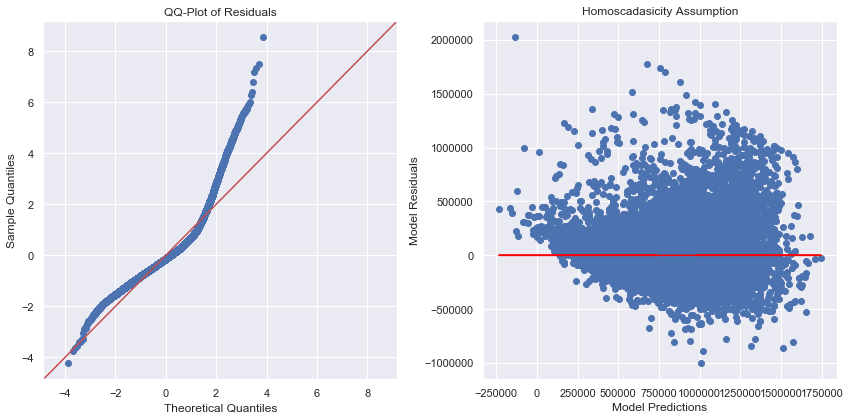

In [12]:
check_for_assumptions(mod2)

Rsquared of Model: 0.5863626335061256
----------
Beta values of Model:
Intercept               -2.479897e+06
squarefeettotalliving    1.662855e+02
buildinggrade            1.032231e+05
township                 8.766743e+04
dtype: float64
Rainbow statistic: 1.0890310156680316
Rainbow p-value: 2.4037617796198836e-05


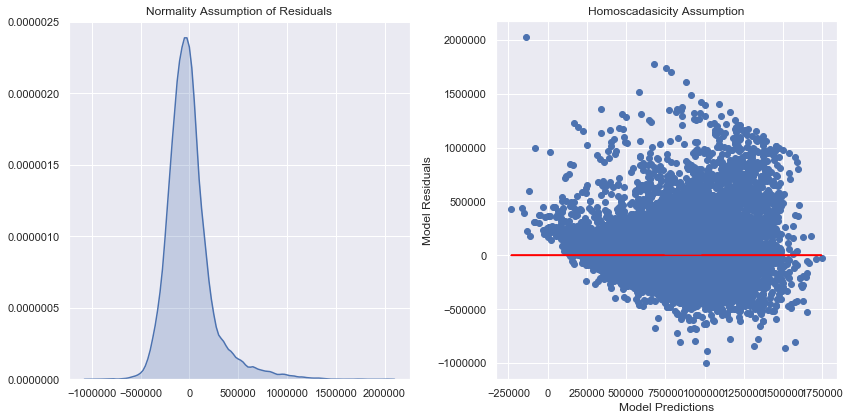

In [13]:
check_for_assumptions_with_kde(mod2)

this doesn't look too bad, but the formula has township as a continuous variable and it really should be a category

In [14]:
mod3_df=fsm_df
formula = 'saleprice ~ squarefeettotalliving + buildinggrade + C(township)'
mod3 = ols(formula=formula, data = mod3_df).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     4406.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:39:22   Log-Likelihood:            -2.4833e+05
No. Observations:               18182   AIC:                         4.967e+05
Df Residuals:                   18172   BIC:                         4.968e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -6.32e+05   1.47e+05     -4.310      0.000   -9.19e+05   -3.45e+05
C(township)[T.20.0]    1.732e+05   1.47e+05      1.181      0.238   -1.14e+05    4.61e+05
C(township)[T.21.0]    1.408e+05   1.46e+05      0.963      0.336   -1.46e+05    4.27e+05
C(township)[T.22.0]    1.889e+05   1.46e+05      1.292      0.196   -9.78e+04    4.76e+05
C(township)[T.23.0]    2.819e+05   1.46e+05      1.928      0.054   -4712.909    5.69e+05
C(township)[T.24.0]    5.169e+05   1.46e+05      3.535      0.000     2.3e+05    8.04e+05
C(township)[T.25.0]    6.954e+05   1.46e+05      4.755      0.000    4.09e+05    9.82e+05
C(township)[T.26.0]    4.485e+05   1.46e+05      3.067      0.002    1.62e+05    7.35e+05
squarefeettotalliving   189.3895      2.722     69.575      0.000     184.054     194.725
buildinggrade          7.328e+04   2099.151     34.910      0.000    6.92e+04    7.74e+04
==============================================================================
Omnibus:                     7218.428   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47653.809
Skew:                           1.770   Prob(JB):                         0.00
Kurtosis:                      10.097   Cond. No.                     5.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

that again improved r^2, time to check assumptions

Rsquared of Model: 0.6857407379215608
----------
Beta values of Model:
Intercept               -631960.436725
C(township)[T.20.0]      173191.661213
C(township)[T.21.0]      140810.296482
C(township)[T.22.0]      188916.688309
C(township)[T.23.0]      281934.530000
C(township)[T.24.0]      516910.348426
C(township)[T.25.0]      695403.813798
C(township)[T.26.0]      448528.571320
squarefeettotalliving       189.389527
buildinggrade             73281.933465
dtype: float64
Rainbow statistic: 1.095123561958463
Rainbow p-value: 7.4605590558490315e-06


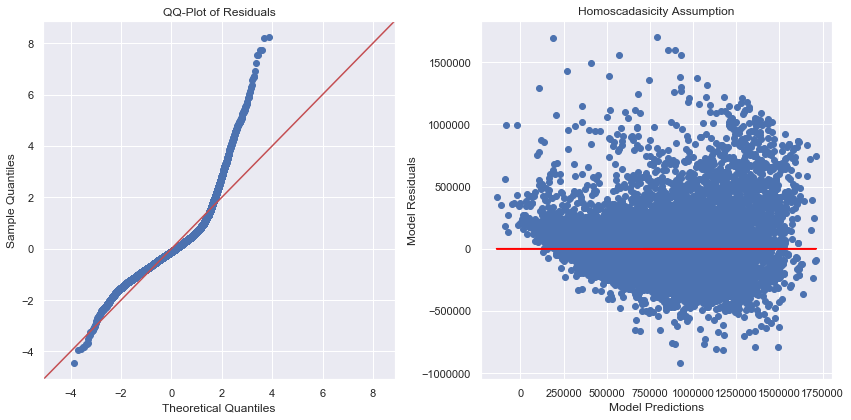

In [15]:
check_for_assumptions(mod3)

Rsquared of Model: 0.6857407379215608
----------
Beta values of Model:
Intercept               -631960.436725
C(township)[T.20.0]      173191.661213
C(township)[T.21.0]      140810.296482
C(township)[T.22.0]      188916.688309
C(township)[T.23.0]      281934.530000
C(township)[T.24.0]      516910.348426
C(township)[T.25.0]      695403.813798
C(township)[T.26.0]      448528.571320
squarefeettotalliving       189.389527
buildinggrade             73281.933465
dtype: float64
Rainbow statistic: 1.095123561958463
Rainbow p-value: 7.4605590558490315e-06


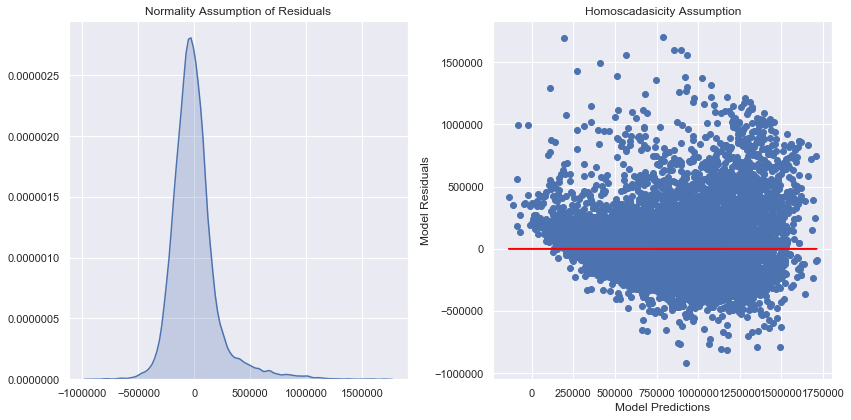

In [17]:
check_for_assumptions_with_kde(mod3)

again, we have building grades as a continuous variable and it really should be a category.  let's see if that changes things much

In [19]:
mod4_df = fsm_df
formula = 'saleprice ~ squarefeettotalliving + C(buildinggrade) + C(township)'
mod4 = ols(formula = formula, data = mod4_df).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2399.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:43:38   Log-Likelihood:            -2.4779e+05
No. Observations:               18182   AIC:                         4.956e+05
Df Residuals:                   18163   BIC:                         4.958e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                1.13e+06   2.46e+05      4.596      0.000    6.48e+05    1.61e+06
C(buildinggrade)[T.3]  -1.177e+06   2.24e+05     -5.245      0.000   -1.62e+06   -7.37e+05
C(buildinggrade)[T.4]  -1.181e+06   2.05e+05     -5.747      0.000   -1.58e+06   -7.78e+05
C(buildinggrade)[T.5]  -1.225e+06   2.01e+05     -6.089      0.000   -1.62e+06   -8.31e+05
C(buildinggrade)[T.6]  -1.261e+06   2.01e+05     -6.281      0.000   -1.65e+06   -8.68e+05
C(buildinggrade)[T.7]  -1.261e+06   2.01e+05     -6.281      0.000   -1.65e+06   -8.68e+05
C(buildinggrade)[T.8]  -1.217e+06   2.01e+05     -6.061      0.000   -1.61e+06   -8.23e+05
C(buildinggrade)[T.9]  -1.082e+06   2.01e+05     -5.388      0.000   -1.48e+06   -6.89e+05
C(buildinggrade)[T.10] -9.137e+05   2.01e+05     -4.545      0.000   -1.31e+06    -5.2e+05
C(buildinggrade)[T.11] -7.629e+05   2.02e+05     -3.784      0.000   -1.16e+06   -3.68e+05
C(buildinggrade)[T.12] -6.412e+05   2.09e+05     -3.065      0.002   -1.05e+06   -2.31e+05
C(township)[T.20.0]     1.837e+05   1.42e+05      1.290      0.197   -9.55e+04    4.63e+05
C(township)[T.21.0]     1.545e+05   1.42e+05      1.088      0.277   -1.24e+05    4.33e+05
C(township)[T.22.0]     2.048e+05   1.42e+05      1.442      0.149   -7.35e+04    4.83e+05
C(township)[T.23.0]     2.868e+05   1.42e+05      2.020      0.043    8443.383    5.65e+05
C(township)[T.24.0]     5.173e+05   1.42e+05      3.643      0.000    2.39e+05    7.96e+05
C(township)[T.25.0]     7.064e+05   1.42e+05      4.975      0.000    4.28e+05    9.85e+05
C(township)[T.26.0]     4.632e+05   1.42e+05      3.262      0.001    1.85e+05    7.42e+05
squarefeettotalliving    184.7058      2.654     69.586      0.000     179.503     189.909
==============================================================================
Omnibus:                     6915.475   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48562.540
Skew:                           1.661   Prob(JB):                         0.00
Kurtosis:                      10.285   Cond. No.                     9.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rsquared of Model: 0.7039320857800547
----------
Beta values of Model:
Intercept                 1.130044e+06
C(buildinggrade)[T.3]    -1.177214e+06
C(buildinggrade)[T.4]    -1.180922e+06
C(buildinggrade)[T.5]    -1.225416e+06
C(buildinggrade)[T.6]    -1.261262e+06
C(buildinggrade)[T.7]    -1.261120e+06
C(buildinggrade)[T.8]    -1.217033e+06
C(buildinggrade)[T.9]    -1.082423e+06
C(buildinggrade)[T.10]   -9.136540e+05
C(buildinggrade)[T.11]   -7.629153e+05
C(buildinggrade)[T.12]   -6.411596e+05
C(township)[T.20.0]       1.837251e+05
C(township)[T.21.0]       1.545234e+05
C(township)[T.22.0]       2.048356e+05
C(township)[T.23.0]       2.867677e+05
C(township)[T.24.0]       5.172604e+05
C(township)[T.25.0]       7.063917e+05
C(township)[T.26.0]       4.631863e+05
squarefeettotalliving     1.847058e+02
dtype: float64
Rainbow statistic: 1.083649275931014
Rainbow p-value: 6.479637644043448e-05


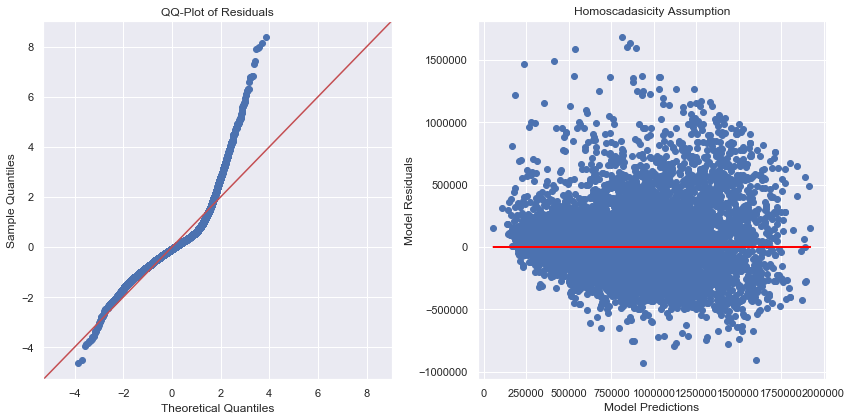

In [20]:
check_for_assumptions(mod4)

Rsquared of Model: 0.7039320857800547
----------
Beta values of Model:
Intercept                 1.130044e+06
C(buildinggrade)[T.3]    -1.177214e+06
C(buildinggrade)[T.4]    -1.180922e+06
C(buildinggrade)[T.5]    -1.225416e+06
C(buildinggrade)[T.6]    -1.261262e+06
C(buildinggrade)[T.7]    -1.261120e+06
C(buildinggrade)[T.8]    -1.217033e+06
C(buildinggrade)[T.9]    -1.082423e+06
C(buildinggrade)[T.10]   -9.136540e+05
C(buildinggrade)[T.11]   -7.629153e+05
C(buildinggrade)[T.12]   -6.411596e+05
C(township)[T.20.0]       1.837251e+05
C(township)[T.21.0]       1.545234e+05
C(township)[T.22.0]       2.048356e+05
C(township)[T.23.0]       2.867677e+05
C(township)[T.24.0]       5.172604e+05
C(township)[T.25.0]       7.063917e+05
C(township)[T.26.0]       4.631863e+05
squarefeettotalliving     1.847058e+02
dtype: float64
Rainbow statistic: 1.083649275931014
Rainbow p-value: 6.479637644043448e-05


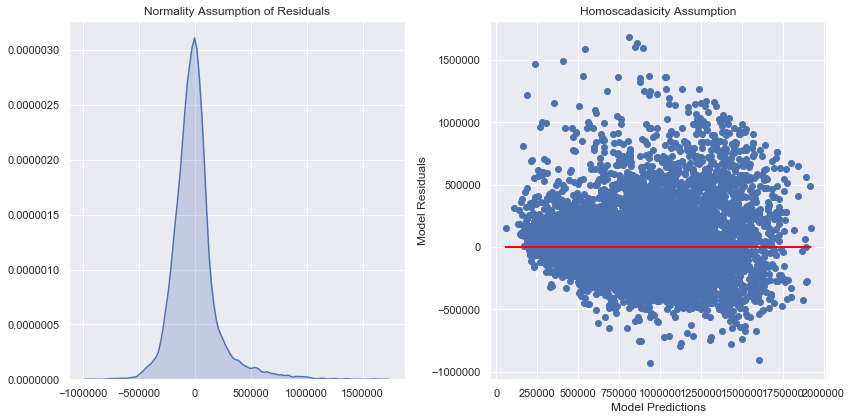

In [21]:
check_for_assumptions_with_kde(mod4)

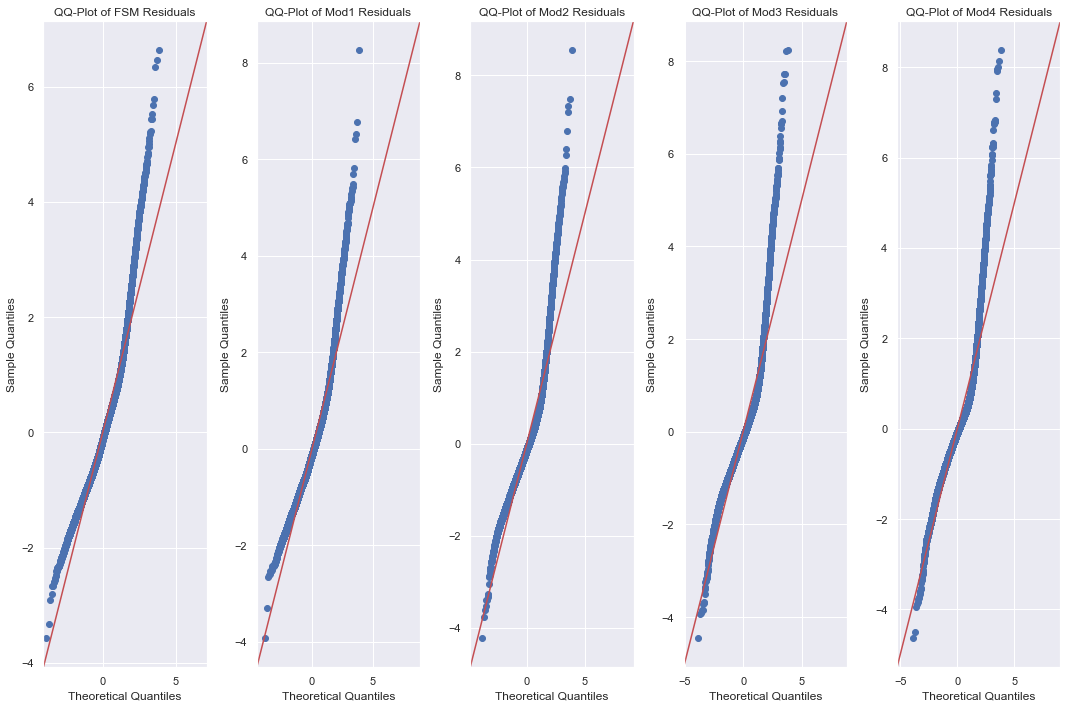

In [67]:
fig, ax = plt.subplots(1,5, figsize=(15,10))
fig = sm.graphics.qqplot(fsm.resid, dist=stats.norm, line='45', fit=True, ax=ax[0])
ax[0].set_title('QQ-Plot of FSM Residuals')
sm.graphics.qqplot(mod1.resid, dist=stats.norm,line='45',fit=True, ax=ax[1])
ax[1].set_title('QQ-Plot of Mod1 Residuals')
sm.graphics.qqplot(mod2.resid, dist=stats.norm,line='45',fit=True, ax=ax[2])
ax[2].set_title('QQ-Plot of Mod2 Residuals')
sm.graphics.qqplot(mod3.resid, dist=stats.norm,line='45',fit=True, ax=ax[3])
ax[3].set_title('QQ-Plot of Mod3 Residuals')
sm.graphics.qqplot(mod4.resid, dist=stats.norm,line='45',fit=True, ax=ax[4])
ax[4].set_title('QQ-Plot of Mod4 Residuals')
sns.set(font_scale= 1)
fig.tight_layout()
plt.show();

so, we are able to improve r^2, and slightly improve linearity.  